In [1]:
"""
Created on Fri Feb  2 21:32:05 2018

Data Incubator project: water usage and country/population stats
"""
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


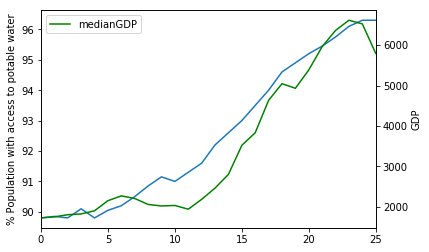

In [2]:
os.chdir('/Users/test2/Downloads')

potable = pd.read_csv('UNdata_Export_PercPotableWater.csv')
lifeExp = pd.read_csv('UNdata_LifeExpectancyatBirth.csv', encoding = 'Latin-1')
GDP = pd.read_csv('UNdata_Export_GDP.csv')
# import 

##########################################
# process potable:
df_potable = potable.drop(['Value Footnotes'], axis = 1)
df_potable = df_potable.pivot(index='Year', columns='Country or Area', values='Value')
df_potable['medianPotable'] = df_potable.median(axis=1)
df_potable = df_potable.reset_index()

# select above the 

##########################################
# process GDP:
# delete Item column and renamed Value as GDP
df_GDP = GDP.drop(['Item'], axis = 1)
 
# reorient data (may not need this - need to divide countries into GDP quartiles)
#df = df_GDP.pivot(index='Year', columns='Country or Area', values='Value')

#averge the GDP for each year
#df['aveGDP'] = df.mean(axis=1)
#df = df.reset_index()
# break GDP into bins to categorize (could also categorize by continent)

# calculate the median for categorizing countries
calc_GDP = df_GDP.groupby(by = 'Year')['Value'].agg({'medianGDP' : np.median}).reset_index()


# combined dataframe
combined = pd.merge(left = calc_GDP[['Year', 'medianGDP']], right = df_potable[['Year', 'medianPotable']], how = 'inner', on = 'Year')

# graphing
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

combined.plot(ax=ax1, y='medianPotable', legend=False)
combined.plot(ax=ax2, y='medianGDP', legend=True, color='g')
ax1.set_ylabel('% Population with access to potable water')
ax2.set_ylabel('GDP')
plt.show()

#not as good of a plotting
#combined.plot(x = 'Year', y = 'avePotable')

# find major industry for each country